In [2]:
import torch
print("CUDA 是否可用:", torch.cuda.is_available())
print("CUDA 版本:", torch.version.cuda)
print("顯卡名稱:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "無")

CUDA 是否可用: True
CUDA 版本: 12.4
顯卡名稱: NVIDIA GeForce RTX 4060


In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
pipeline = AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
).to("cuda")
# 這行可以加速21倍
# pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

Loading pipeline components...: 100%|██████████| 6/6 [00:10<00:00,  1.83s/it]


100%|██████████| 100/100 [04:24<00:00,  2.65s/it]


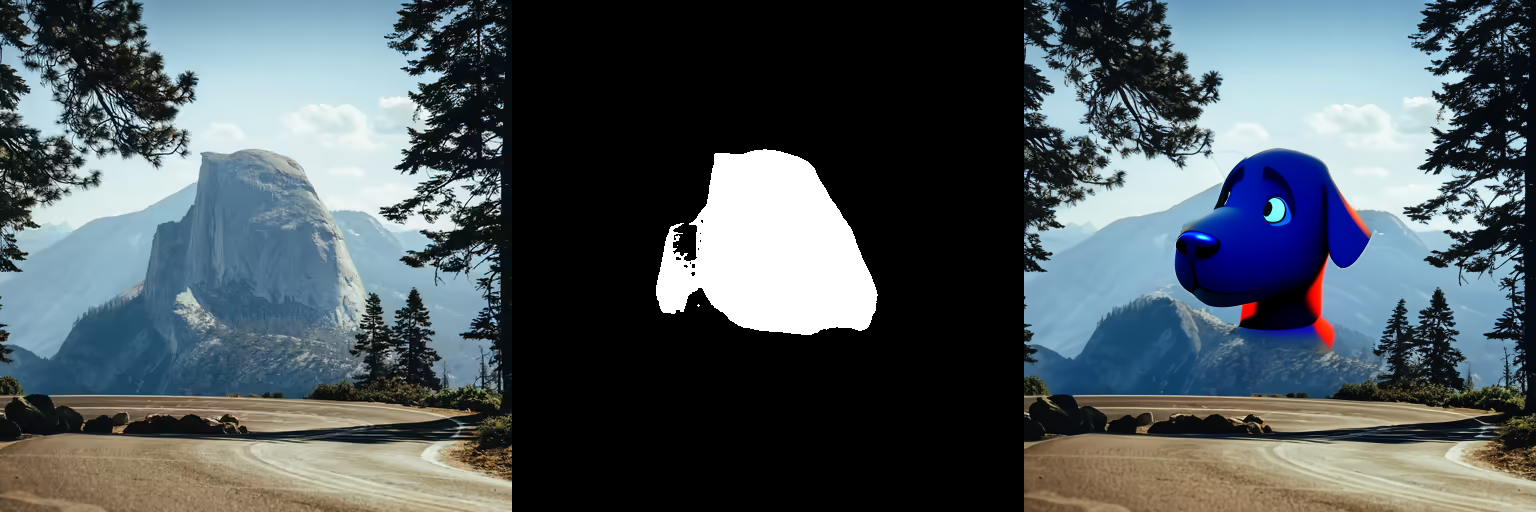

In [8]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

prompt = "a black dog with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, mask_image=mask_image).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)